Enter keyword/HashTag to search about: Bitcoins
Enter how many tweets to analyze: 300


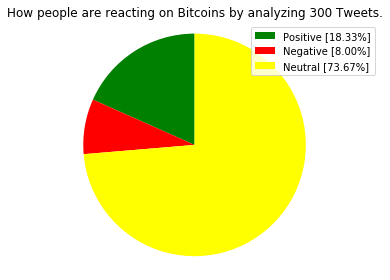

In [4]:
#Importing Library for connecting Twitter, identify sentiments and ploting graph
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt

#Method to generate percentage value
def percentage(part, whole):
    return 100 * float(part)/float(whole)

#Twitter api keys for connection hidden using environmental variables
import os
consumerKey = os.environ.get('TwitterConsumerKey')
consumerSecret = os.environ.get('TwitterConsumerSecret')
accessToken = os.environ.get('TwitterAccessToken')
accessTokenSecret = os.environ.get('TwitterAccessTokenSecret')

#Connecting to Twitter
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

#Getting input from the user
searchTerm = input("Enter keyword/HashTag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

#Collecting tweets based on input
tweets = tweepy.Cursor(api.search, q=searchTerm ).items(noOfSearchTerms)

#Variable initialzing
positive = 0
negative = 0
neutral = 0 
polarity = 0


#Segregating sentiments on three category
for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1

#Converting to percentage
positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)


#Formating with two decimals
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

#print("How people are reacting on " + searchTerm + " by analyzing " + str(noOfSearchTerms) + " Tweets.")
# if (polarity == 0):
#     print("Neutral")
# elif (polarity > 0.00):
#     print("Positive")
# elif (polarity < 0.00):
#     print("Negative")
#print(polarity)

#Providing arguments for the chart
labels = ['Positive [' + str(positive) + '%]', 'Negative [' + str(negative) + '%]', 'Neutral [' + str(neutral) + '%]']
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']
patches, text = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()

#Displaying the results in chart
plt.show()